<a href="https://colab.research.google.com/github/vitorqueijo/AllsidesAnalysis/blob/master/allsides_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiple regression analysis of newspaper's political bias (Allsides's dataset)
####by Vítor Queijo, Science and Technology graduation student

In [0]:
import pandas as pd #import pandas library for dataframe
import numpy as np #linear algebra tool
import matplotlib.pyplot as plt 
import seaborn as sns #data visualization

In [265]:
data = pd.read_csv('allsides.csv')
data.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
0,11169,1.362073,Somewhat Agrees,https://www.allsides.com/news-source/abc-news-...,left-center,8200,ABC News,19369
1,3225,0.650202,Disagrees,https://www.allsides.com/news-source/al-jazeer...,center,4960,Al Jazeera,8185
2,3138,2.595533,Strongly Agrees,https://www.allsides.com/news-source/allsides-0,allsides,1209,AllSides,4347
3,2032,1.673806,Agrees,https://www.allsides.com/news-source/allsides-...,allsides,1214,AllSides Community,3246
4,2064,2.898876,Strongly Agrees,https://www.allsides.com/news-source/alternet,left,712,AlterNet,2776


In [266]:
data.shape

(274, 8)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
agree             274 non-null int64
agree_ratio       274 non-null float64
agreeance_text    274 non-null object
allsides_page     274 non-null object
bias              274 non-null object
disagree          274 non-null int64
name              274 non-null object
total_votes       274 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 17.2+ KB


### First, we need to understand the correlation between bias and agreeance.

In [268]:
data.agreeance_text.unique()

array(['Somewhat Agrees', 'Disagrees', 'Strongly Agrees', 'Agrees',
       'Somewhat Disagrees', 'Absolutely Agrees', 'Strongly Disagrees',
       'Neutral'], dtype=object)

In [0]:
dict_agree = {
    'Somewhat Agrees' : 1,
    'Disagrees' : -2,
    'Strongly Agrees' : 3,
    'Agrees' : 2,
    'Somewhat Disagrees' : -1,
    'Absolutely Agrees' : 4,
    'Strongly Disagrees' : -3,
    'Neutral' : 0
}

In [270]:
data_agree_degree = data.replace({"agreeance_text" : dict_agree})
data_agree_degree.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,name,total_votes
0,11169,1.362073,1,https://www.allsides.com/news-source/abc-news-...,left-center,8200,ABC News,19369
1,3225,0.650202,-2,https://www.allsides.com/news-source/al-jazeer...,center,4960,Al Jazeera,8185
2,3138,2.595533,3,https://www.allsides.com/news-source/allsides-0,allsides,1209,AllSides,4347
3,2032,1.673806,2,https://www.allsides.com/news-source/allsides-...,allsides,1214,AllSides Community,3246
4,2064,2.898876,3,https://www.allsides.com/news-source/alternet,left,712,AlterNet,2776


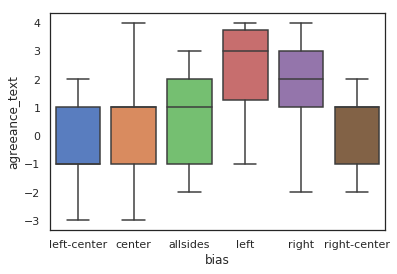

In [271]:
agreeance_y = data_agree_degree['agreeance_text']
bias_x = data_agree_degree['bias']
categorical_axis =  sns.boxplot(x= bias_x, y=agreeance_y )

### In the boxplot above, it seems that extreme bias tends to be confirmed more often by the public's judgement, meanwhile centrist's views are unconfirmed by them. Hence, it raises the first premises: the more agree's ratio from a newspaper increase it's more likely that it has an extreme bias.

In [0]:
data_leftvotes = data.query("bias=='left'").total_votes
data_rightvotes = data.query("bias=='right'").total_votes

In [0]:
data_left = data_agree_degree.query("bias=='left'").agreeance_text
data_right = data_agree_degree.query("bias=='right'").agreeance_text

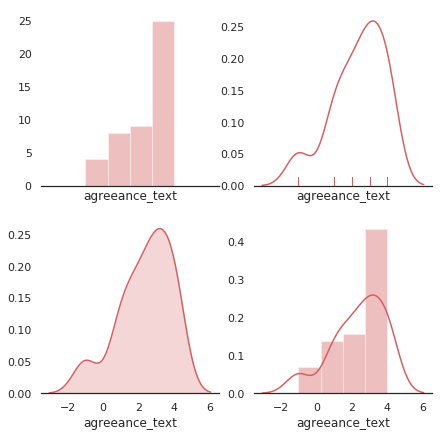

In [274]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data_left, kde=False, color="r", ax=axes[0,0])
sns.distplot(data_left, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data_left, hist=False, color="r", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data_left, color="r", ax=axes[1, 1])



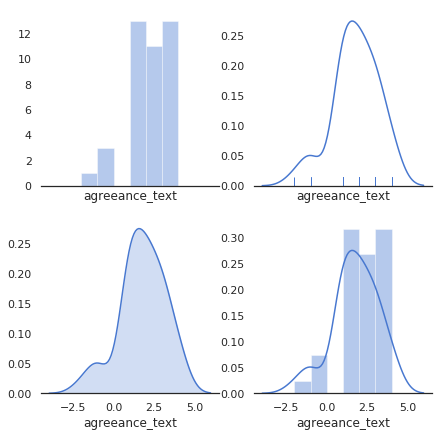

In [275]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data_right, kde=False, color="b", ax=axes[0,0])
sns.distplot(data_right, hist=False, rug=True, color="b", ax=axes[0, 1])
sns.distplot(data_right, hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data_right, color="b", ax=axes[1, 1])

## The real multiple regression analysis



---


### This article propose that if the extrem bias are frequently accompanied by an higher agree ratio, this regression's purpose is to prove that's probably predictble.


---



In [0]:
biases = pd.get_dummies(data.bias, drop_first=True)
y = data.agree_ratio
data = data.drop(['bias','name','allsides_page','agreeance_text','agree_ratio'], axis=1)

In [277]:
data = pd.concat([data,biases], axis=1)
data.head()

,agree,disagree,total_votes,center,left,left-center,right,right-center
0,11169,8200,19369,0,0,1,0,0
1,3225,4960,8185,1,0,0,0,0
2,3138,1209,4347,0,0,0,0,0
3,2032,1214,3246,0,0,0,0,0
4,2064,712,2776,0,1,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=0)

In [279]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(data_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_prediction = regr.predict(data_test)

In [281]:
from sklearn.metrics import r2_score
agree_score = r2_score(y_test, y_prediction)
print(agree_score)

0.3384797735679903


# Conclusion:

### Since we are working on a social experiment, a low-Rsquare is expected. Which means that even if it seems that extreme biases are often highlighted by the public opinion easily, the model made in this article wasn't effective to predict the agreeance ratio, i. e. probably the contemporary concept of political bias are fuzzly since there's no metric on nationality or ethinics.